### Stacked bar chart of common objects in a region or location

__Purpose:__ Make static barcharts that can be downloaded from repo.

__Reference:__ Getting-data

#### Variables to assign:

1) "project_name", in block one. This is the destination folder for the charts.

2) "water_body", this is the lake or river you want a chart for 

3) "file_name", this is a despcriptive. The value of waterbody will be prepended to the this and the file extension will be appended. It should state clearly the data you are capturing.

4) "start_date" and "end_date", this the date range you want for the analysis 

5) "min_date" and "max date", this appears in the figure title. Use common three letter abbreviations.

6) "percent" in the kwargs dictionary will allow you to aggregate objects. The default is 2% (.02), which means that objects whose total count is less than 2% of the total are put in one category "All other objects".

Saving your workbook remotely: Make a branch and submit a pull request for that branch.


In [1]:
import numpy as np
import json
import csv
import datetime
import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib import colors as mcolors
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from utilities.utility_functions import *
import utilities.stackedBarChart as stackedBarChart
from utilities.style_title_suptitle import *

In [2]:
# index slicing will be used 
idx = pd.IndexSlice

# store the curent working directory
here = os.getcwd()

# name the folders where the output will be sored:
folders = ["data", "charts", "utilities"]

# check for existing and if not make folders
check_for_folders(folders, here)

# make a dictionary to call path by directory name
my_folders = make_folders(folders, here)

# make a project folder to store charts
project_name = "common/"
project_directory = make_project_folder(my_folders['charts'], project_name)

print(project_directory)

Directory already in place
/home/mwshovel/dev/analyst/abundance/charts/common/


In [3]:
# Read the JSON data in from local

# the file names with the extensions:
files_i_need = [
    'mlw_codes.json',
    'beach_data.json',
    'waterbody_groups.json',    
]
what_i_need = {x[:-5]:'{}/{}'.format(my_folders['data'],x) for x in files_i_need}

data_i_need = {name:json_file_get(value) for name, value in what_i_need.items()}


In [4]:
# transform the data and read in the survey results

# transform the code definitions from an array to a python dictionary
code_dict = make_code_dict(data_i_need['mlw_codes'])

# example: Add a the material type to the desription of a code
some_arguments = {'Material':'Metal', 'source':'Food', 'description':'Metal bottle caps & lids','code':'G178'}
make_code_dict(code_dict, make_a_code=False, make_group=False, change_a_code=True, **some_arguments)  

# transform the the waterbody groups from an array to a python dictionary
water_body_names = make_code_dict(data_i_need['waterbody_groups'], make_a_code=False, make_group=True, change_a_code=False)

# Read in the .csv data
survey_results = pd.read_csv('/home/mwshovel/dev/analyst/abundance/data/survey_results.csv')

# make a timestamp column from the JSON string date
survey_results['py_date'] = pd.to_datetime(survey_results['date'])

In [5]:
# assign variables

# the location of interest:
water_body = 'Lac Léman'
file_name = '{}-common-2015-2019'.format('lac-leman')

# set the file save parameters
save_this = file_params(project_directory, file_name, ['.svg','.jpeg'])

# use the water_body variable to extract all the data for that waterbody and store the varaible
df_location = survey_results[survey_results['location'].isin(water_body_names[water_body])]

# dates for slicing data
start_date = '2015-11-15'
end_date = '2019-12-31'

# use the date range to slice the data
date_range = start_end_date(start_date,end_date, "%Y-%m-%d")
a_df = get_data_by_date_range(df_location, date_range)

# legend and title contents
chart_title = 'All objects found'
figure_title = water_body
legend_title = 'Object description: quantity'

# Axis labels
y_axis = axis_label_props(label='Number of objects found')
x_axis = axis_label_props(label='*Identified items equal to less than 2% of the total.\nCaps and lids are plastic unless noted.')

# provide a color map https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
color_map = 'PuBuGn'

# choose wether to use a tight layout or not:
tight_layout = False

In [6]:

save_this = file_params(project_directory, file_name, ['.svg','.jpeg'])

chart_args = {
     "min_date":make_mo_year_abbrev(start_date),
     "max_date":make_mo_year_abbrev(end_date),
     "a_df":a_df,
     "percent":.02,
     "date_range":date_range,
     "title_style":title_styles(),
     "the_title_position": title_position(),
     "the_title":title_content(label=chart_title),
     "sup_title_style":title_styles(fs=14, fw='roman'),
     "sup_title_position":the_sup_title_position(),
     "the_sup_title":title_content(label=figure_title),
     "code_dict":code_dict,
     "the_legend_style":legend_style(title=legend_title),
     "legend_title":legend_t_align(),
     "color_map":color_map,
     "y_axis":y_axis,
     "x_axis":x_axis,
     "subplot_params":adjust_subplot_params(),
     "save_this":save_this,
     "tight_layout":tight_layout
 }

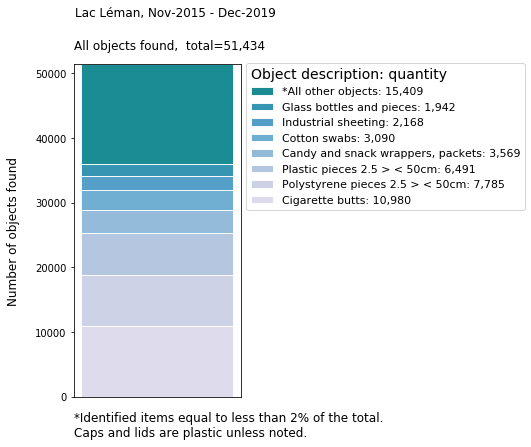

In [7]:
stackedBarChart.stackedBarChart(**chart_args)